<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ds5110/summer-2021/blob/master/03c-DataStructuring.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# 3c -- Data Structuring

# Some tabular data structures

* Tidy data (R)
* Long-form data (R & Seaborn)
* Wide-form "Messy" data (Seaborn)

## References

* [Tidy data](https://vita.had.co.nz/papers/tidy-data.html) (2014) by Hadley Whickam -- original paper
* [Chapter 12: Tidy data](https://r4ds.had.co.nz/tidy-data.html) from *R for Data Science* (2017) by Wickham & Grolmund, 
* [long-form and wide-form data](https://seaborn.pydata.org/tutorial/data_structure.html) -- seaborn.pydata.org


# Data structures

### Glossary

* "observation" -- all measurements of a "thing" (e.g., iris, penguin, place, etc.)
* "variable" -- common set of "attributes" (e.g., height, temperature, ...) that may have units (e.g., cm, deg C, etc.)
* "value" -- a number (quantitative) or string (categorical/qualitative) that belongs to each observation and variable

## Tidy data defined

With "tidy" data...

* Every column is a variable.
* Every row is an observation.
* Every cell is a single value.

In [ ]:
import pandas as pd

In [ ]:
# Q: Is this data tidy?
url = "https://github.com/ds5110/summer-2021/raw/master/data/classroom.csv"
pd.read_csv(url)

,name,quiz1,quiz2,test1
0,Billy,NaN,D,C
1,Suzy,F,NaN,NaN
2,Lionel,B,C,B
3,Jenny,A,A,B


### The Seaborn perspective

"For a longer discussion about tabular data structures, you could read the “Tidy Data” paper by Hadley Whickham. Note that **seaborn uses a slightly different set of concepts** than are defined in the paper. While the paper associates tidyness with long-form structure, **we have drawn a distinction between “tidy wide-form” data, where there is a clear mapping between variables in the dataset and the dimensions of the table, and “messy data”, where no such mapping exists**.

The **long-form structure has clear advantages**. It allows you to create figures by explicitly assigning variables in the dataset to roles in plot, and you can do so with more than three variables. When possible, try to represent your data with a long-form structure when embarking on serious analysis. Most of the examples in the seaborn documentation will use long-form data. **But in cases where it is more natural to keep the dataset wide [messy], remember that seaborn can remain useful**."

Ref: [long-form and wide-form data](https://seaborn.pydata.org/tutorial/data_structure.html) -- seaborn.pydata.org



In [ ]:
import pandas as pd

In [ ]:
url = "https://github.com/ds5110/summer-2021/raw/master/data/classroom.csv"
df = pd.read_csv(url)
df

,name,quiz1,quiz2,test1
0,Billy,NaN,D,C
1,Suzy,F,NaN,NaN
2,Lionel,B,C,B
3,Jenny,A,A,B


## Aside: Reading and writing CSV with pandas

This is a possible gotcha -- so be aware.

In [ ]:
# WARNING: You can write a CSV (almost) as easily as you can read one.
# Compare the output of this cell with the output above.

df.to_csv('myfile.csv') # You probably don't want to do this...
pd.read_csv('myfile.csv') # ...if you're going to do this

,Unnamed: 0,name,quiz1,quiz2,test1
0,0,Billy,NaN,D,C
1,1,Suzy,F,NaN,NaN
2,2,Lionel,B,C,B
3,3,Jenny,A,A,B


In [ ]:
# Q: What's with "Unnamed: 0" column above?
# A: You can do this (read with index=False, then .read_csv() without keywords)
df.to_csv('myfile.csv', index=False)
pd.read_csv('myfile.csv')

,name,quiz1,quiz2,test1
0,Billy,NaN,D,C
1,Suzy,F,NaN,NaN
2,Lionel,B,C,B
3,Jenny,A,A,B


In [ ]:
# A (cont): You can also write without keywords, then read with index_col=0
df.to_csv('myfile.csv')
pd.read_csv('myfile.csv', index_col=0)

,name,quiz1,quiz2,test1
0,Billy,NaN,D,C
1,Suzy,F,NaN,NaN
2,Lionel,B,C,B
3,Jenny,A,A,B


## The moral of the story: 

Look at your data and double check.

And here's [another example](https://stackoverflow.com/questions/25788037/pandas-df-to-csvfile-csv-encode-utf-8-still-gives-trash-characters-for-min/43684587) of how things can go wrong. These kinds of data cleaning issues can become time consuming and not fun.

And that's one reason JSON was created! (...and adopted by the open source geospatial community when they created GeoJSON).

In [ ]:
# BTW, in case you were wondering about "\n", it's a standard encoding
# "\n" is a 2-charater string representation of a carriage return
df.iloc[0,0] = -1
df.to_csv(index=False)

'name,quiz1,quiz2,test1\n-1,,D,C\nSuzy,F,,\nLionel,B,C,B\nJenny,A,A,B\n'

In [ ]:
# When you `print()` a string with "\n" you get at carriage return
print(df.to_csv(index=False))

name,quiz1,quiz2,test1
-1,,D,C
Suzy,F,,
Lionel,B,C,B
Jenny,A,A,B



# Data structures in seaborn

### Long-form table

* Each variable is a column
* Each observation is a row



In [ ]:
import seaborn as sns

# This table has 144 * 3 entries = 429
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


To create a plot of:
* monthly: `month = "hue"`
* curves: `kind = "line"`
* of passengers: `y="passengers"`
* versus years: `x="years"`

it's one line...

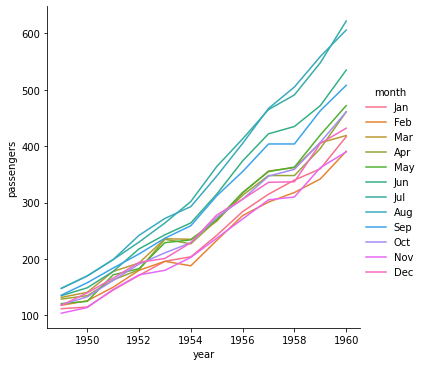

In [ ]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line");

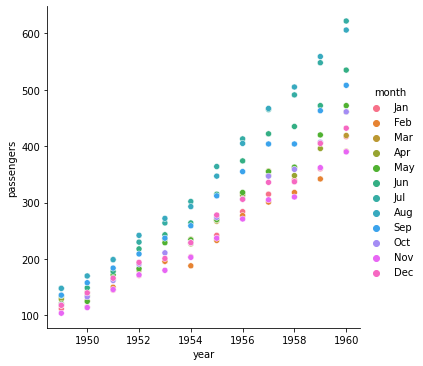

In [ ]:
# The other plot option is scatter plot
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="scatter");

# Wide-form data

* This is the format more common in a spreadsheet
* The variables in this dataset are linked to the dimensions of the table, rather than to named fields.
* Each observation is defined by both the value at a cell in the table and the coordinates of that cell with respect to the row and column indices.


In [ ]:
# This format has 12 years * 12 months = 144 entries
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [ ]:
# You can choose to pivot with index and columns
flights_wider = flights.pivot(index="month", columns="year", values="passengers")
flights_wider

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


Plotting wide-form (spreadsheet-style) data is easier.

But you need to specify the units of the vertical axis (i.e., dependent variable, `y`)

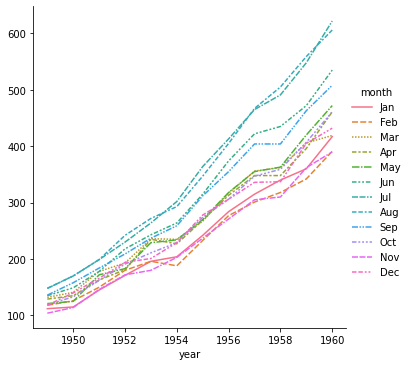

In [ ]:
sns.relplot(data=flights_wide, kind="line")

Additional formatting comes from a default style with relplot. 

You can get the same thing with long-form data

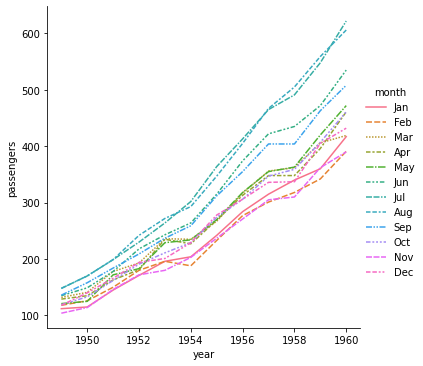

In [ ]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", style="month", kind="line")

You can easily change the dependent variable (e.g., swap "year" & "month") with long-from tables...

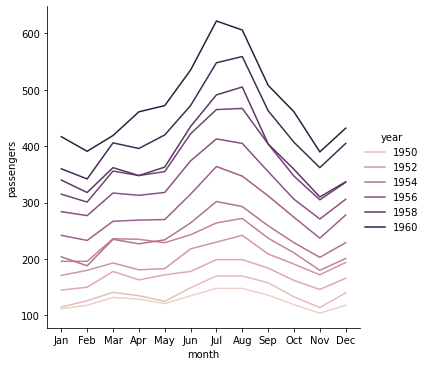

In [ ]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

With wide-form data, you need use the transposed array (`flights_wider`).

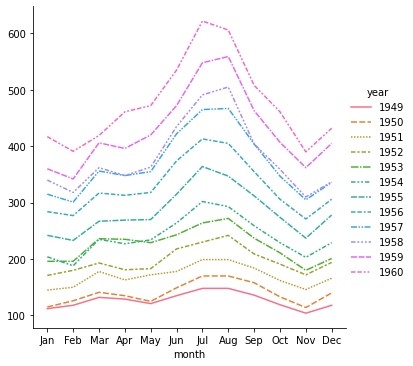

In [ ]:
sns.relplot(data=flights_wider, kind="line")

Likewise for boxplots...

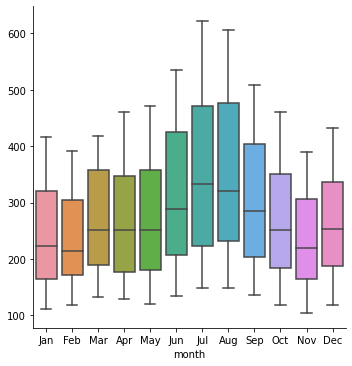

In [ ]:
sns.catplot(data=flights_wide, kind="box")

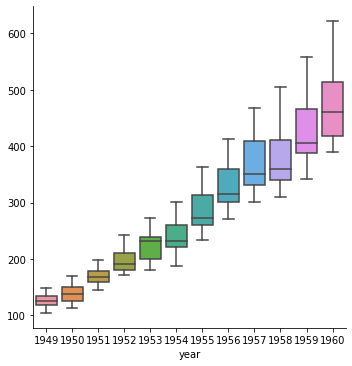

In [ ]:
sns.catplot(data=flights_wider, kind="box")

# Case study: cognitive performance

Consider this psychology experiment...

* Each of 20 human subjects (`"subidr" = {1, 2, ...20}`),
* is asked to solve a series of 3 anagram puzzles (`{"num1", "num2", "num3"}`)
* will being distracted or allowed to focus (`"attnr" = {"divided", "focused"}`).
* Their performance is measured for each task (values associated with (`{"num1", "num2", "num3"}`)
* and combined to create a single measure of cognitive performance.

In [ ]:
anagrams = sns.load_dataset("anagrams")
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


## Q: Is this a tidy dataset?

## A: No


# Messy data

* Many datasets are not clearly long-form or wide-form. 
* If datasets that are clearly long-form or wide-form are “tidy”, we might say that these more ambiguous datasets are “messy”. 
* In a messy dataset, variables are neither uniquely defined by the keys nor by the dimensions of the table. This often occurs with repeated-measures data, where it is natural to organize a table such that each row corresponds to the unit of data collection.

## Psychology experiment

* The attention variable is between-subjects 
* The solutions variable (encoded in multiple colums) is within-subjects
* The dependent measure is a combined score of memory performance. 
* These two variables (number and score) are jointly encoded across several columns. 
*As a result, the whole dataset is neither clearly long-form nor clearly wide-form.

# Tidying up Messy data

* We'll transform the messy psychology-experiment data into a tidy long-form table.
* Each variable is a column, and 
* Each row is an observation. 

Transform messy data into tidy data using `DataFrame.melt`

[pandas.DataFrame.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) -- Unpivots a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where:
* one or more columns are identifier variables (id_vars), 
* **all** other columns are considered measured variables (value_vars)
* the measured variables are “unpivoted” to the row axis, 
* this leaves just two non-identifier columns, ‘variable’ and ‘value’.

In [ ]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name="solutions", value_name="score")
anagrams_long

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0
5,6,divided,num1,5.0
6,7,divided,num1,5.0
7,8,divided,num1,5.0
8,9,divided,num1,2.0
9,10,divided,num1,6.0


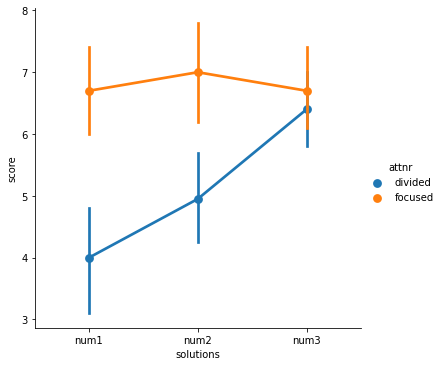

In [ ]:
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point")

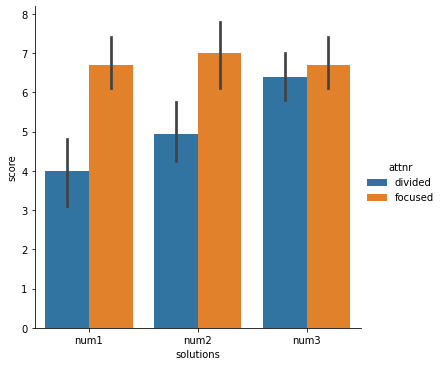

In [ ]:
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="bar");

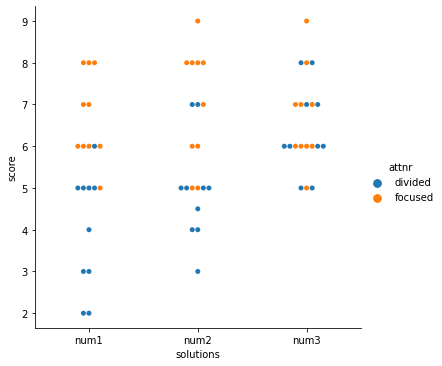

In [ ]:
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="swarm");

# EXERCISE...